Problem 2
a

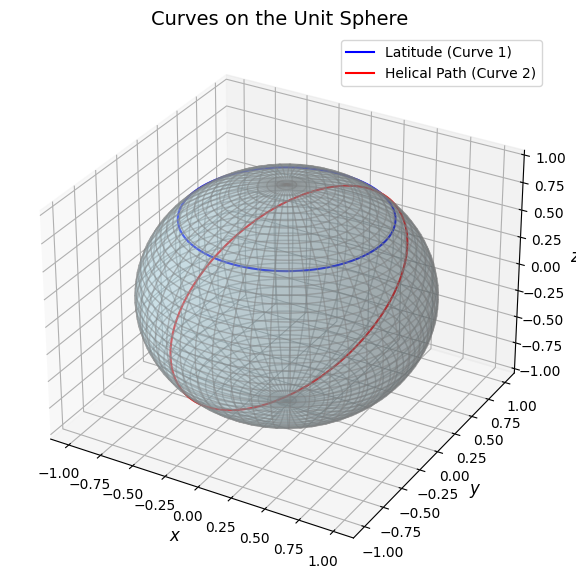

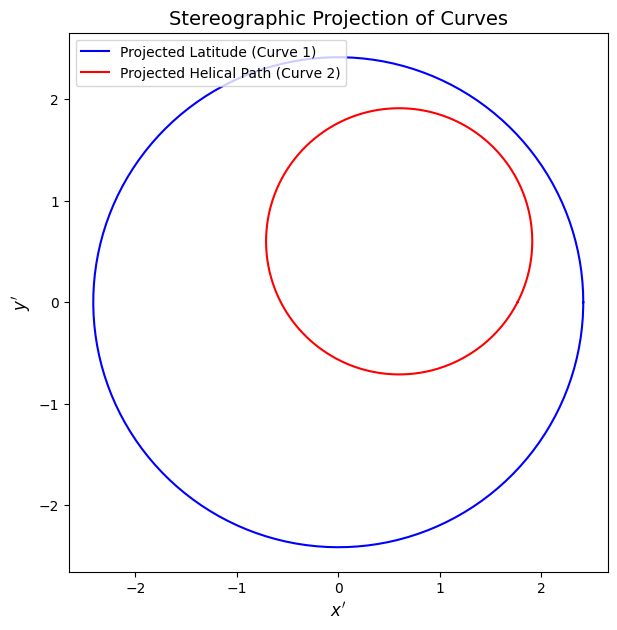

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin, cos, pi, linspace, meshgrid, full_like

# Stereographic projection function
def stereographic_projection(x, y, z):
    denom = 1 - z
    x_proj = np.full_like(x, np.nan, dtype=float)
    y_proj = np.full_like(y, np.nan, dtype=float)
    mask = denom != 0
    x_proj[mask] = x[mask] / denom[mask]
    y_proj[mask] = y[mask] / denom[mask]
    return x_proj, y_proj

# Function to generate the unit sphere mesh
def generate_sphere_mesh(theta_steps=50, phi_steps=50):
    theta = np.linspace(0, np.pi, theta_steps)
    phi = np.linspace(0, 2 * np.pi, phi_steps)
    theta, phi = np.meshgrid(theta, phi)
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return x, y, z, theta, phi

# Generate the sphere mesh
x, y, z, theta, phi = generate_sphere_mesh()

# Define Curve 1: Latitude at 45 degrees (constant theta)
t = np.linspace(0, 2 * np.pi, 300)
curve1_x = np.sin(np.pi / 4) * np.cos(t)
curve1_y = np.sin(np.pi / 4) * np.sin(t)
curve1_z = np.cos(np.pi / 4) * np.ones_like(t)

# Define Curve 2: A helical-like path on the sphere
curve2_x = np.cos(t)
curve2_y = np.sin(t)
curve2_z = (3 * curve2_x + 3 * curve2_y) / 5
magnitude = np.sqrt(curve2_x**2 + curve2_y**2 + curve2_z**2)
curve2_x /= magnitude
curve2_y /= magnitude
curve2_z /= magnitude

# Project curves using stereographic projection
curve1_proj_x, curve1_proj_y = stereographic_projection(curve1_x, curve1_y, curve1_z)
curve2_proj_x, curve2_proj_y = stereographic_projection(curve2_x, curve2_y, curve2_z)

# Plot the curves on the sphere
fig1 = plt.figure(figsize=(10, 7))
ax3d = fig1.add_subplot(111, projection='3d')
ax3d.plot_surface(x, y, z, color='lightblue', alpha=0.3, edgecolor='grey')
ax3d.plot(curve1_x, curve1_y, curve1_z, label='Latitude (Curve 1)', color='blue')
ax3d.plot(curve2_x, curve2_y, curve2_z, label='Helical Path (Curve 2)', color='red')
ax3d.set_title('Curves on the Unit Sphere', fontsize=14)
ax3d.set_xlabel('$x$', fontsize=12)
ax3d.set_ylabel('$y$', fontsize=12)
ax3d.set_zlabel('$z$', fontsize=12)
ax3d.legend()
plt.show()

# Plot the curves in the projection plane
fig2 = plt.figure(figsize=(10, 7))
ax2 = fig2.add_subplot(111)
ax2.plot(curve1_proj_x, curve1_proj_y, label='Projected Latitude (Curve 1)', color='blue')
ax2.plot(curve2_proj_x, curve2_proj_y, label='Projected Helical Path (Curve 2)', color='red')
ax2.set_title('Stereographic Projection of Curves', fontsize=14)
ax2.set_xlabel("$x'$", fontsize=12)
ax2.set_ylabel("$y'$", fontsize=12)
ax2.set_aspect('equal')
ax2.legend()
plt.show()


B

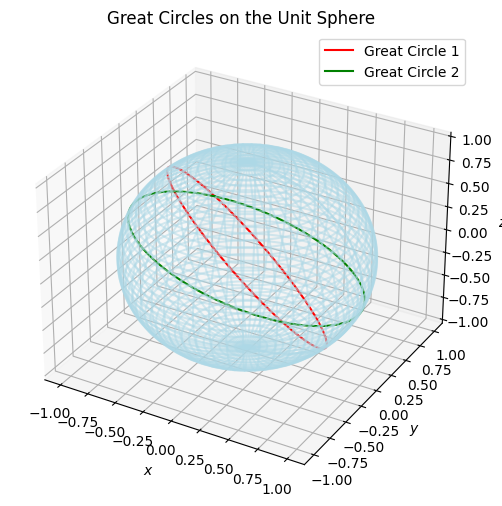

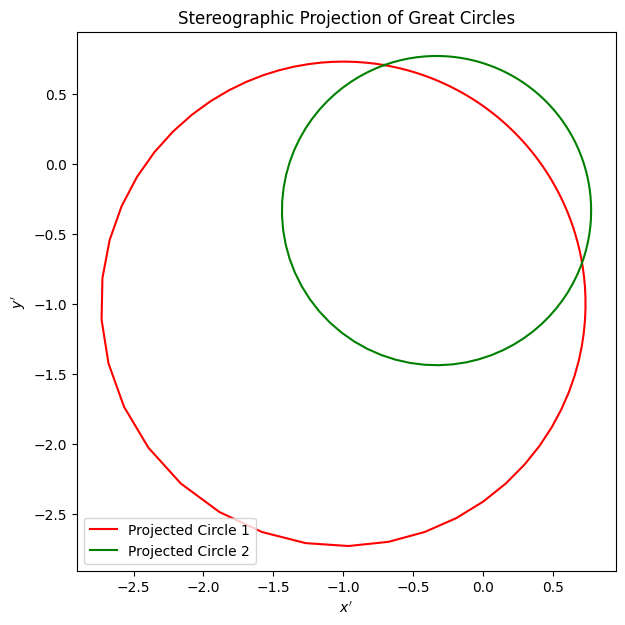

In [35]:
# Generate Cartesian coordinates for the sphere
def cartesian_coordinates(theta_angle, phi_angle):
    return (
        sin(theta_angle) * cos(phi_angle),
        sin(theta_angle) * sin(phi_angle),
        cos(theta_angle),
    )

# Generate theta and phi angles
theta_angle = np.linspace(0, np.pi, 100)
phi_angle = np.linspace(0, 2 * np.pi, 100)
theta_angle, phi_angle = np.meshgrid(theta_angle, phi_angle)

# Plot the unit sphere with great circles
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(8, 6))
ax.plot_wireframe(*cartesian_coordinates(theta_angle, phi_angle), color='lightblue', alpha=0.5)

# Function to generate a great circle on the sphere
def great_circle(normal_vec):
    normal_vec = array(normal_vec, dtype='float64')
    normal_vec /= np.linalg.norm(normal_vec)
    p1 = array([-normal_vec[1], normal_vec[0], 0])
    p1 /= np.linalg.norm(p1)
    p2 = np.cross(normal_vec, p1)
    psi = linspace(0, 2 * pi, 100)
    return outer(p1, cos(psi)) + outer(p2, sin(psi))

# Add great circles to the sphere
ax.plot(*great_circle((2, 2, 2)), color='r', label='Great Circle 1')
ax.plot(*great_circle((1, 1, 3)), color='g', label='Great Circle 2')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title("Great Circles on the Unit Sphere")
ax.legend()
plt.show()

# Function to project great circles stereographically
def stereo_circle(normal_vec):
    x, y, z = great_circle(normal_vec)
    mask = (1 - z) != 0  # Avoid division by zero
    x_proj = x / (1 - z)
    y_proj = y / (1 - z)
    x_proj[~mask] = np.nan  # Handle points where the projection is undefined
    y_proj[~mask] = np.nan
    return x_proj, y_proj

# Plot the stereographic projection of great circles
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(*stereo_circle((2, 2, 2)), color='r', label='Projected Circle 1')
ax.plot(*stereo_circle((1, 1, 3)), color='g', label='Projected Circle 2')
ax.set_aspect('equal')  # Ensure the projection looks circular
ax.set_xlabel("$x'$")
ax.set_ylabel("$y'$")
ax.set_title("Stereographic Projection of Great Circles")
ax.legend()
plt.show()


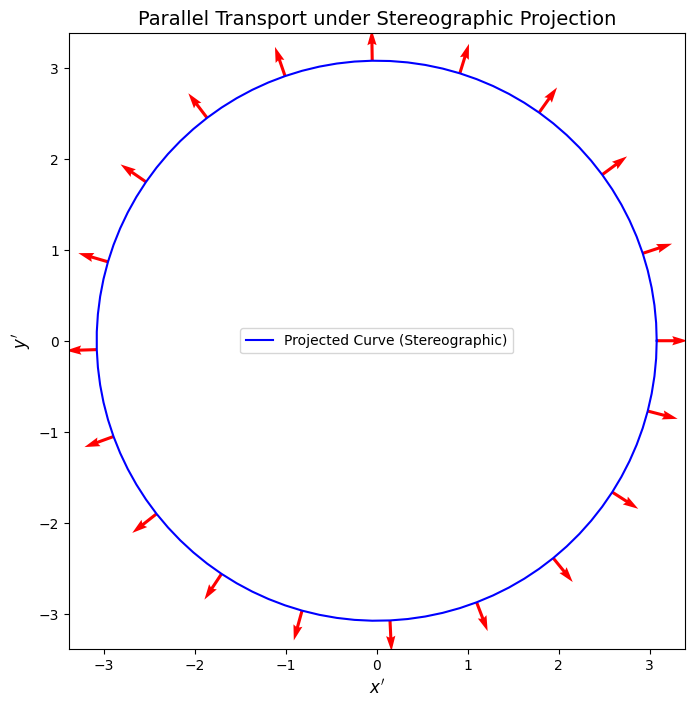

In [ ]:
#c
# Conversion from spherical to Cartesian
def spherical_to_cartesian(r, theta, phi):
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return np.array([x, y, z])

# Basis vectors in spherical coordinates to Cartesian coordinates
def spherical_basis_to_cartesian(theta, phi):
    e_r = np.array([
        np.sin(theta) * np.cos(phi),
        np.sin(theta) * np.sin(phi),
        np.cos(theta)
    ])
    e_theta = np.array([
        np.cos(theta) * np.cos(phi),
        np.cos(theta) * np.sin(phi),
        -np.sin(theta)
    ])
    e_phi = np.array([
        -np.sin(phi),
        np.cos(phi),
        0
    ])
    return e_r, e_theta, e_phi

# Stereographic projection
def stereographic_projection(x, y, z):
    denom = 1 - z
    mask = denom != 0
    x_proj = np.full_like(x, np.nan, dtype=float)
    y_proj = np.full_like(y, np.nan, dtype=float)
    x_proj[mask] = x[mask] / denom[mask]
    y_proj[mask] = y[mask] / denom[mask]
    return x_proj, y_proj

# Parallel transport simulation
def parallel_transport():
    # Parameters
    theta_start = np.pi / 5  # Initial position
    phi_start = 0           # Starting longitude
    num_points = 100        # Number of points in the path

    # Discretize the path
    phi_vals = np.linspace(0, 2 * np.pi, num_points)

    # Initial vector in spherical basis
    alpha = 1.0  # Component along e_theta
    beta = 0.0   # Component along e_phi
    n_theta = alpha
    n_phi = beta

    # Normalize the initial vector
    norm = np.sqrt(n_theta**2 + n_phi**2)
    n_theta /= norm
    n_phi /= norm

    # Store transported vectors and positions
    transported_vectors = []
    positions = []

    for phi in phi_vals:
        # Get basis vectors at the current position
        e_r, e_theta, e_phi = spherical_basis_to_cartesian(np.pi / 5, phi)

        # Compute Cartesian coordinates of the transported vector
        n_cartesian = n_theta * e_theta + n_phi * e_phi

        # Store the vector and position
        positions.append(spherical_to_cartesian(1, np.pi / 5, phi))
        transported_vectors.append(n_cartesian)

    # Convert lists to numpy arrays for easier handling
    positions = np.array(positions)
    transported_vectors = np.array(transported_vectors)

    # Stereographic projection of positions and vectors
    pos_x_proj, pos_y_proj = stereographic_projection(
        positions[:, 0], positions[:, 1], positions[:, 2]
    )
    vec_x_proj, vec_y_proj = stereographic_projection(
        transported_vectors[:, 0], transported_vectors[:, 1], transported_vectors[:, 2]
    )

    # Visualization
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(pos_x_proj, pos_y_proj, color='blue', label='Projected Curve (Stereographic)')
    for i in range(0, len(pos_x_proj), 5):  # Downsample for clarity
        ax.quiver(
            pos_x_proj[i], pos_y_proj[i],
            vec_x_proj[i], vec_y_proj[i],
            color='red', angles='xy', scale_units='xy', scale=1.5, width=0.005
        )

    # Plot styling
    ax.set_aspect('equal')
    ax.set_xlabel("$x'$", fontsize=12)
    ax.set_ylabel("$y'$", fontsize=12)
    ax.set_title("Parallel Transport under Stereographic Projection", fontsize=14)
    ax.legend()
    plt.show()

# Run the parallel transport simulation
parallel_transport()


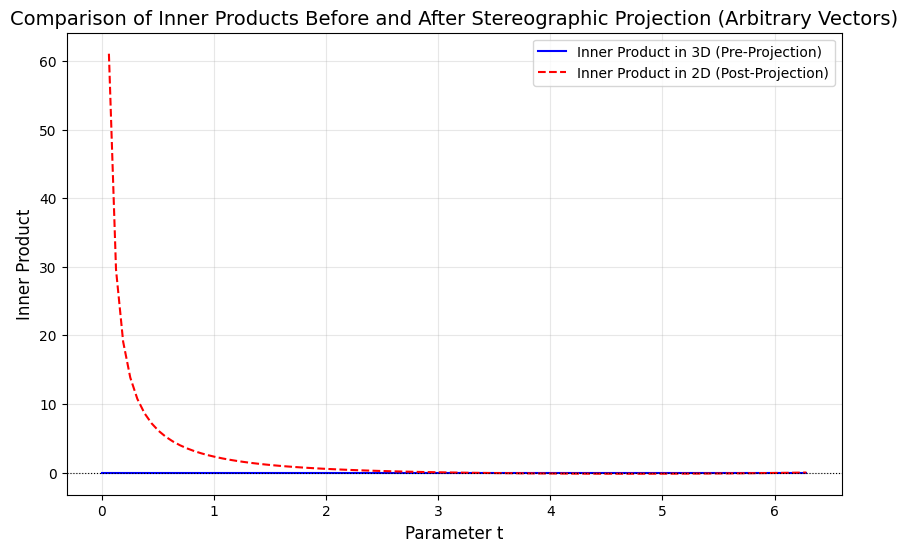

In [ ]:
#d
#  Function to compute inner products
def calculate_inner_product(vectors1, vectors2):
    return np.einsum('ij,ij->i', vectors1, vectors2)

# Generate two arbitrary unit vectors on the sphere
def generate_vectors_on_sphere(theta, phi):
    v1 = np.array([np.sin(theta) * np.cos(phi), np.sin(theta) * np.sin(phi), np.cos(theta)])
    v2 = np.array([np.cos(theta) * np.cos(phi), np.cos(theta) * np.sin(phi), -np.sin(theta)])
    return v1, v2

# Stereographic projection
def stereographic_projection(x, y, z):
    denom = 1 - z
    mask = denom != 0
    x_proj = np.full_like(x, np.nan, dtype=float)
    y_proj = np.full_like(y, np.nan, dtype=float)
    x_proj[mask] = x[mask] / denom[mask]
    y_proj[mask] = y[mask] / denom[mask]
    return x_proj, y_proj

# Parameters
num_points = 100
theta_vals = np.linspace(0, np.pi, num_points)
phi_vals = np.linspace(0, 2 * np.pi, num_points)

# Initialize inner product arrays
inner_products_3D = []
inner_products_2D = []

for theta, phi in zip(theta_vals, phi_vals):
    # Generate vectors on the sphere
    v1, v2 = generate_vectors_on_sphere(theta, phi)

    # Compute inner product in 3D (before projection)
    inner_products_3D.append(np.dot(v1, v2))

    # Stereographic projection
    v1_proj_x, v1_proj_y = stereographic_projection(v1[0:1], v1[1:2], v1[2:3])
    v2_proj_x, v2_proj_y = stereographic_projection(v2[0:1], v2[1:2], v2[2:3])

    # Compute inner product in 2D (after projection)
    v1_proj = np.array([v1_proj_x[0], v1_proj_y[0]])
    v2_proj = np.array([v2_proj_x[0], v2_proj_y[0]])
    inner_products_2D.append(np.dot(v1_proj, v2_proj))

# Convert to arrays for plotting
inner_products_3D = np.array(inner_products_3D)
inner_products_2D = np.array(inner_products_2D)

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(phi_vals, inner_products_3D, label="Inner Product in 3D (Pre-Projection)", color="blue")
plt.plot(phi_vals, inner_products_2D, label="Inner Product in 2D (Post-Projection)", color="red", linestyle="--")
plt.axhline(0, color="black", linestyle=":", linewidth=0.8)
plt.title("Comparison of Inner Products Before and After Stereographic Projection (Arbitrary Vectors)", fontsize=14)
plt.xlabel("Parameter t", fontsize=12)
plt.ylabel("Inner Product", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


No, sterographic projection doesn't preserve inner product. It only preserve angular relationship, not inner product. 

In [ ]:
#f
# Function to compute holonomy
def calculate_holonomy(vector, num_steps=100):
    transported_vector = parallel_transport_on_projection(vector, np.pi / 4, 0, num_steps)
    holonomy_vector = transported_vector[-1] - vector
    return np.linalg.norm(holonomy_vector)

# Define initial vector and calculate holonomy
initial_vector = np.array([1, 0, 0])
holonomy = calculate_holonomy(initial_vector)

# Display holonomy
print(f"Holonomy magnitude after one loop: {holonomy:.4f}")

Holonomy magnitude after one loop: 0.0000


No, it can't alter holonomy. Holonom is independent of coordinate choice. 